# Pymaceuticals Inc.
---

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset

combine = pd.merge(study_results, mouse_metadata, how = "left", on = "Mouse ID")

# Display the data table for preview

combine.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
# Checking the number of mice.
len(combine["Mouse ID"].unique())

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicates = combine[combine.duplicated(subset = ["Mouse ID", "Timepoint"], keep = False)].sort_values(by = "Mouse ID")
print(f"Total Potential Duplicates {len(duplicates)}")
duplicates.head(10)

Total Potential Duplicates 10


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


#### Note on Duplicated Mouse
---
Based on the potential duplicates, we cannot confidently confirm which duplicate should be kept. Therefore, the Mouse ID g989 would be considered corrupt, and will be removed from the dataframe. 

In [4]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
combine_clean = combine[combine["Mouse ID"] != "g989"]

In [5]:
# Checking the number of mice in the clean DataFrame.
number_of_mice = len(combine_clean["Mouse ID"].unique())
print(f"The Number of Mice is {number_of_mice}")

The Number of Mice is 248


## Summary Statistics

In [6]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

summary = combine_clean[["Drug Regimen", "Tumor Volume (mm3)"]]
summary = summary.groupby("Drug Regimen")
summary_mean = summary.mean()
summary_median = summary.median()
summary_variance = summary.var()
summary_std = summary.std()
summary_sem = summary.sem()

summary_list = [summary_mean, summary_median, summary_variance, summary_std, summary_sem]

summary_columns = ["Mean Tumor Volume", "Median Tumor Volume", "Tumor Volume Variance", 
                   "Tumor Volume Std. Dev", "Tumor Volume Std. Err."]

summary_statistics = pd.concat(summary_list, axis = 1)



summary_statistics.columns = summary_columns 

summary_statistics.head()

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466


In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen
# Using the aggregation method, produce the same summary statistics in a single line.

summary = combine_clean.groupby("Drug Regimen")[["Tumor Volume (mm3)"]].agg(["mean", "median", "var", "std", "sem"])

summary.head()

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466

## Bar and Pie Charts

In [8]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

bar = combine_clean.groupby("Timepoint")[["Timepoint"]].count()

bar.rename({"Timepoint": "Count of Timepoint"}, axis = 1, inplace = True)


In [9]:
bar.reset_index(inplace = True)

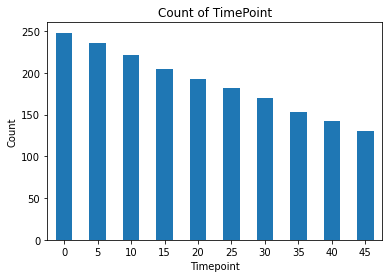

In [10]:
# Generating First Bar Plot with Pandas
bar.plot(kind = "bar", x = "Timepoint", y = "Count of Timepoint", ylabel = "Count", title = "Count of TimePoint", 
         rot = 0, legend = False)


plt.show()

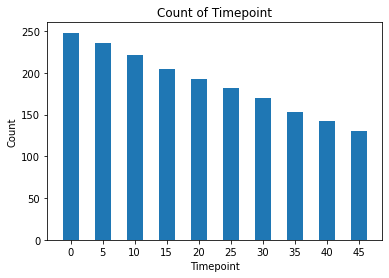

In [11]:
# Generating Second Bar Plot with pyplot
plt.bar(bar["Timepoint"], bar["Count of Timepoint"], width = 2.5)
plt.xlabel("Timepoint")
plt.ylabel("Count")
plt.title("Count of Timepoint")
plt.xticks(bar["Timepoint"])
plt.show()

In [12]:
combine_clean.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [13]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
male_female = combine_clean.groupby("Sex")[["Sex"]].agg("count")
male_female.rename({"Sex": "Count of Sex"}, axis = 1, inplace = True)


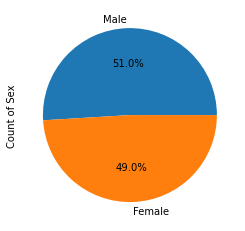

In [14]:
male_female = male_female.sort_values("Count of Sex", ascending = False)
male_female.plot(kind = "pie", y = "Count of Sex", autopct='%1.1f%%',
                legend = False)

plt.show()

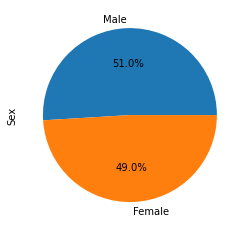

In [16]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ["Male", "Female"]
plt.pie(male_female["Count of Sex"], autopct = "%1.1f%%", labels= labels)
plt.ylabel("Sex")
plt.show()

## Quartiles, Outliers and Boxplots

In [17]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
 
# Start by getting the last (greatest) timepoint for each mouse

Greatest_Timepoint = combine_clean.groupby("Mouse ID")[["Timepoint"]].agg("max")
Greatest_Timepoint.reset_index(inplace = True)

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint

tumor_volume_final = pd.merge(Greatest_Timepoint, combine_clean, on = ["Mouse ID", "Timepoint"])

In [18]:
tumor_volume_final.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29


In [19]:
# Put treatments into a list for for loop 

Drug_Regimen = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list for plotting 
Plotting = []

# Create empty Dict to store Outliers
Outliers = {"Capomulin": [],
           "Ramicane": [],
           "Infubinol": [],
           "Ceftamin": []}

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for Drug in Drug_Regimen:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    volume = tumor_volume_final.loc[tumor_volume_final["Drug Regimen"] == Drug, "Tumor Volume (mm3)"].to_frame()
    
    # Determine outliers using upper and lower bounds
    quartiles = volume["Tumor Volume (mm3)"].quantile([0.25,0.5,0.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    
    # Store value in list for Plotting 
    Plotting.append(volume["Tumor Volume (mm3)"].to_list())
    
    # Store value in dict for outlier identification
    potential = volume.loc[~volume["Tumor Volume (mm3)"].between(lower_bound, upper_bound, inclusive = "both"), "Tumor Volume (mm3)"]
    Outliers[Drug] = potential

    # Printing Results 
    print(f"{Drug}'s Potential Outlier: {Outliers[Drug]}")


Capomulin's Potential Outlier: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's Potential Outlier: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's Potential Outlier: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's Potential Outlier: Series([], Name: Tumor Volume (mm3), dtype: float64)


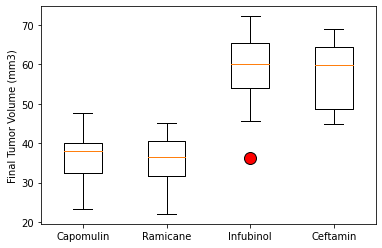

In [20]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

# Formatting FlierProps
fig, ax1 = plt.subplots()

flierprops = dict(marker='o', markerfacecolor='r', markersize=12,
                  linestyle='none')


ax1.boxplot(Plotting, flierprops = flierprops)

# Setting in Axis Labels
tick_locations = [1,2,3,4]

ax1.set_xticks(tick_locations, Drug_Regimen)

ax1.set_ylabel("Final Tumor Volume (mm3)")

plt.show()


## Line and Scatter Plots

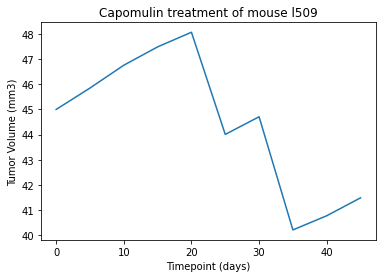

In [21]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
Capomulin = combine_clean[(combine_clean["Drug Regimen"] == "Capomulin") & (combine_clean["Mouse ID"] == "l509")]

Capomulin.plot(kind = "line", x = "Timepoint", y = "Tumor Volume (mm3)", legend = False,
              xlabel = "Timepoint (days)", ylabel = "Tumor Volume (mm3)", 
               title = "Capomulin treatment of mouse l509")
plt.show()

In [22]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
Weight_Capomulin = combine_clean[combine_clean["Drug Regimen"] == "Capomulin"]
Weight_Capomulin_Average = Weight_Capomulin.groupby(["Weight (g)", "Mouse ID"])[["Tumor Volume (mm3)"]].agg("mean")
Weight_Capomulin_Average.reset_index(inplace = True)



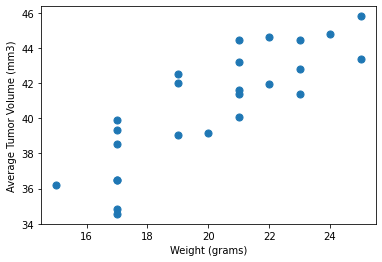

In [23]:
Weight_Capomulin_Average.plot(kind = "scatter", x = "Weight (g)", y = "Tumor Volume (mm3)", legend = False,
               xlabel = "Weight (grams)", ylabel = "Average Tumor Volume (mm3)", s= 50)
plt.show()

## Correlation and Regression

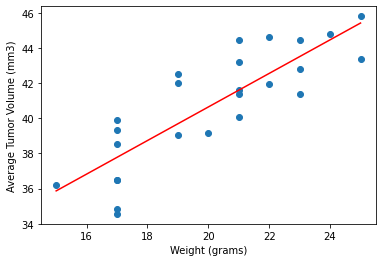

The correlation between mouse weight and the average tumor volume is 0.84


In [24]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

# Axis Variables
x_values = Weight_Capomulin_Average['Weight (g)']
y_values = Weight_Capomulin_Average['Tumor Volume (mm3)']

# Get line Eq
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plotting Graph
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.xlabel('Weight (grams)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()

print(f"The correlation between mouse weight and the average tumor volume is {round(rvalue, 2)}")

## Observations and Insights 
----

1) There is a high correlation between mouse weight and average tumor volume. Perhaps this needs to be normalized when comparing the effectivness of drug regimens. 

2) The Treatment of Capomulin was able to decrease the total tumor volume. However, this needs to be compared against a control, and statistical significance demonstrated. 

3) Out of the 4 drug regimens explored ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]:

* Capomulin and Ramicane seem to reduce tumor volume more than Infubinol and Ceftamin. 